In [ ]:
import os
import pandas as pd
import numpy as np
import glob
import json

import matplotlib.pyplot as plt

import sys
from pathlib import Path

repo_root = Path.cwd().parent
if str(repo_root) not in sys.path:
    sys.path.insert(0, str(repo_root))

from utils.dataset import DataSet



In [ ]:
# data folder
folder_data = '/home/anaflo/MDMC/thesis/sensorium/data/'

# metadata folder
folder_meta = '/home/anaflo/MDMC/thesis/sensorium/metadata/'

# mice/recording folders
all_recording_folders = [
    'dynamic29156-11-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29234-6-9-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce',
    'dynamic29514-2-9-Video-8744edeac3b4d1ce16b680916b5267ce',
]



In [ ]:
# Inizialize and object from DataSet to handle the dataset
dat = DataSet(folder_data, folder_metadata=folder_meta)

# Check if there are videos repeated across recordings

In [4]:
# Find the videos repeated across recordings
counts = dat.count_videos_across(['recording','label','ID'])

# Find IDs that have more than 1 unique recording
ids_with_diff_recordings = counts.groupby('ID')['recording'].nunique()
ids_with_diff_recordings = ids_with_diff_recordings[ids_with_diff_recordings > 1].index

# Filter the rows with those IDs
result = counts[counts['ID'].isin(ids_with_diff_recordings)]

print(result)


Loading trials metadata...
Empty DataFrame
Columns: [recording, label, ID, count]
Index: []


# Count the number of replicates per video within each label

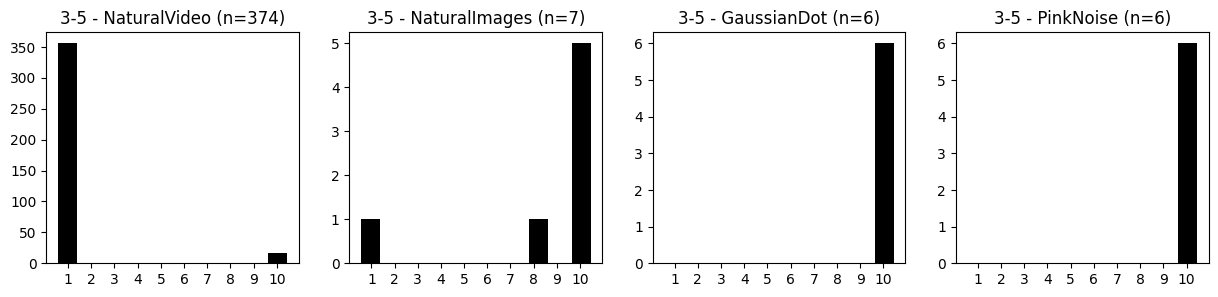

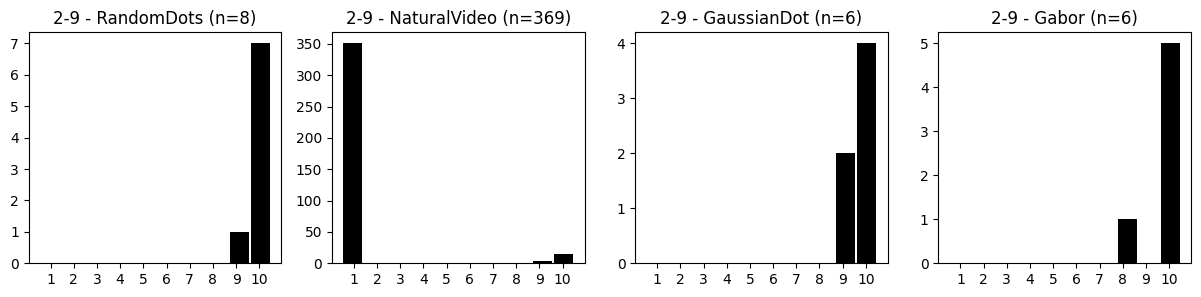

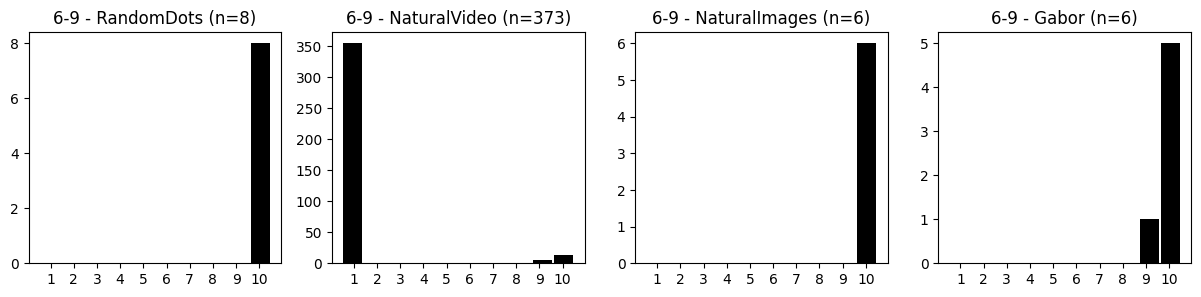

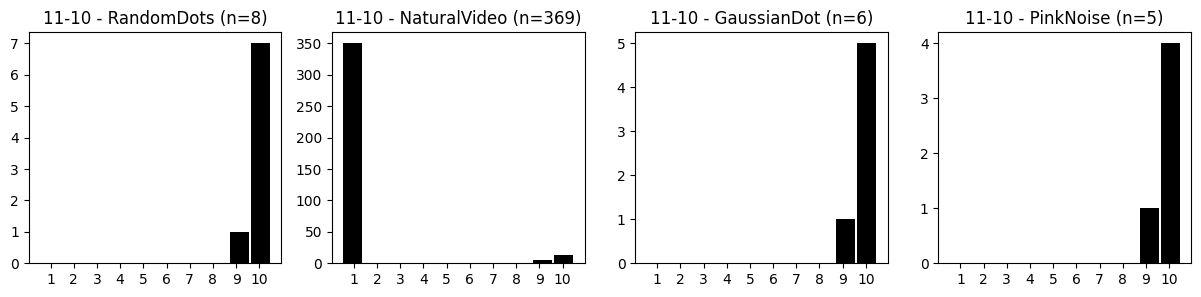

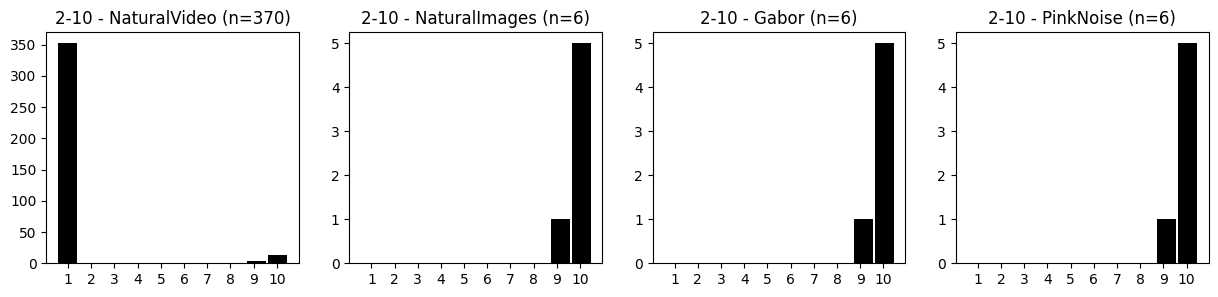

In [5]:
# for each recording and label find the number of replicates of each video
counts = dat.count_videos_across(['recording','label','ID'])
for rec in dat.recording:
    all_trials_df_rec = dat.filter_trials(recording=rec)
    labels = set(all_trials_df_rec['label'].to_list())
        
    fig, ax =plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
    for i, label in enumerate(labels):
        d = counts[(counts['recording']==rec) & (counts['label']==label)]['count'].to_numpy()
        h = ax[i].hist(d, range=(.5, 10.5), bins=11, color='k',rwidth=0.9)
        ax[i].set_xticks(np.arange(1,11))
        ax[i].set_title(f"{rec[13:rec.find('Video')-1]} - {label} (n={len(d)})")

### Check what happens with recording 1 NaturalImages
It has one video that appears only once

In [6]:
rec = 'dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce'
label = "NaturalImages"
counts[(counts['recording']==rec) & (counts['label']==label)]

,recording,label,ID,count
74,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v062658,10
76,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v089720,10
77,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v360898,10
78,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v484546,10
79,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v683710,10
184,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,8
583,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v565001,1


Check the videos that appears 8 times and the one appering only once

In [7]:
dat.filter_trials(recording='dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce', label="NaturalImages", ID='v874315')

,recording,label,ID,trial,trial_type,valid_frames,valid_trial
191,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,702,live_test_main,305,True
302,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,719,train,305,True
495,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,689,train,305,True
537,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,685,final_test_bonus,306,True
677,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,693,live_test_bonus,306,True
679,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,705,live_test_bonus,306,True
687,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,717,live_test_bonus,305,True
694,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v874315,681,live_test_bonus,305,True


In [8]:
dat.filter_trials(recording='dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce', label="NaturalImages", ID='v565001')

,recording,label,ID,trial,trial_type,valid_frames,valid_trial
267,dynamic29513-3-5-Video-8744edeac3b4d1ce16b6809...,NaturalImages,v565001,668,train,403,False


the video appearing once, is not a valid trial. It corresponds to the video with bad segments

In [9]:
dat.filter_trials(recording='dynamic29513-3-5-Video-8744edeac3b4d1ce16b680916b5267ce', label="NaturalImages", ID='v565001', valid_trial=True)

,recording,label,ID,trial,trial_type,valid_frames,valid_trial


In [10]:
video_i = dat.load_video_by_trial(recording=rec, trial='702')
video_j = dat.load_video_by_trial(recording=rec, trial='668')

(<Figure size 1500x600 with 15 Axes>,
 array([[<Axes: title={'center': 'frame 50'}>,
         <Axes: title={'center': 'frame 51'}>,
         <Axes: title={'center': 'frame 52'}>,
         <Axes: title={'center': 'frame 53'}>,
         <Axes: title={'center': 'frame 54'}>],
        [<Axes: title={'center': 'frame 55'}>,
         <Axes: title={'center': 'frame 56'}>,
         <Axes: title={'center': 'frame 57'}>,
         <Axes: title={'center': 'frame 58'}>,
         <Axes: title={'center': 'frame 59'}>],
        [<Axes: title={'center': 'frame 60'}>,
         <Axes: title={'center': 'frame 61'}>,
         <Axes: title={'center': 'frame 62'}>,
         <Axes: title={'center': 'frame 63'}>,
         <Axes: title={'center': 'frame 64'}>]], dtype=object))

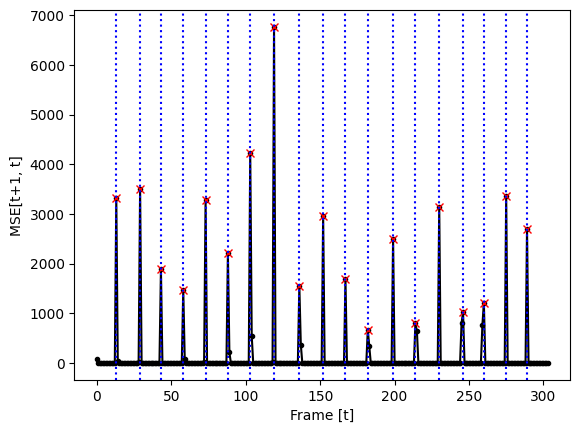

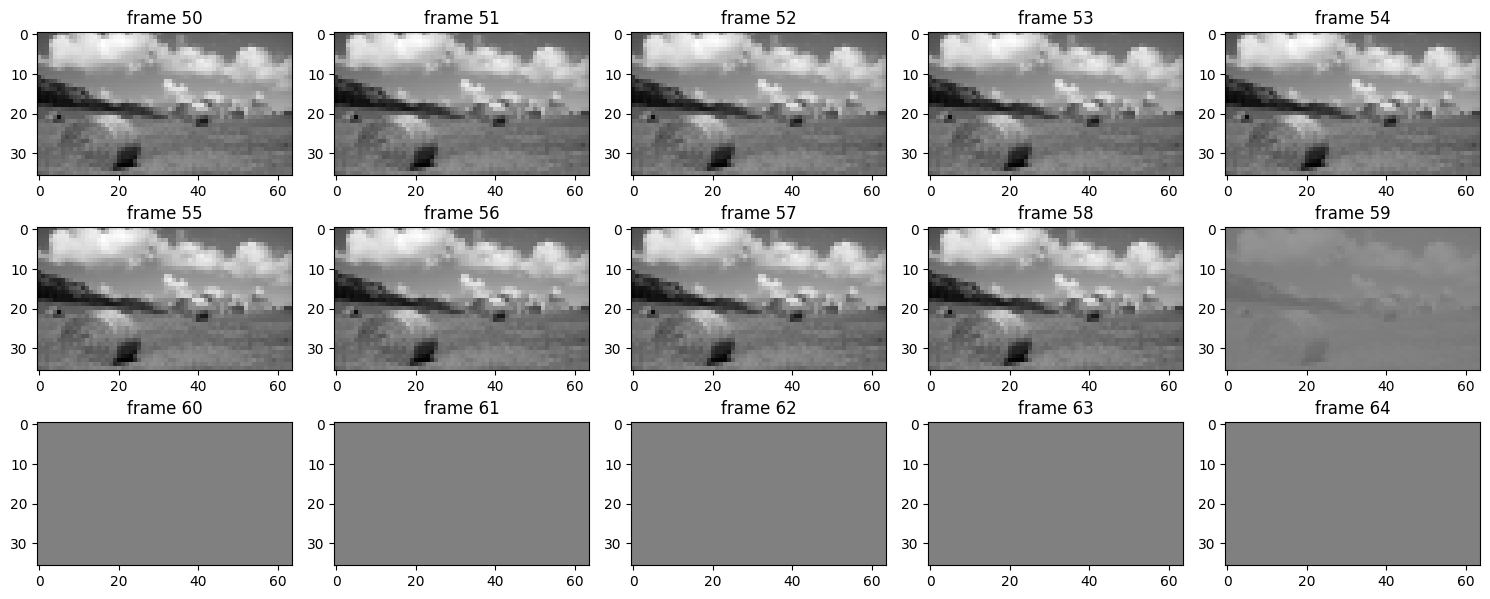

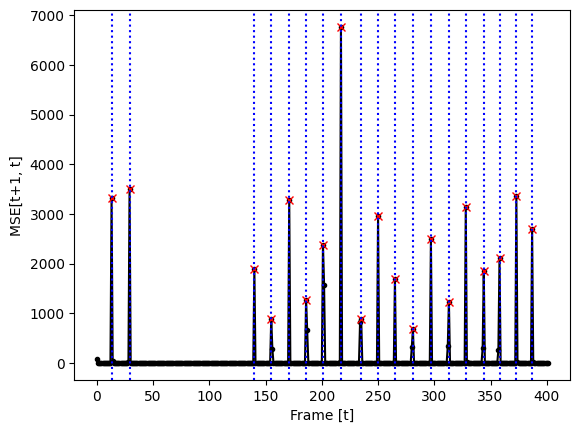

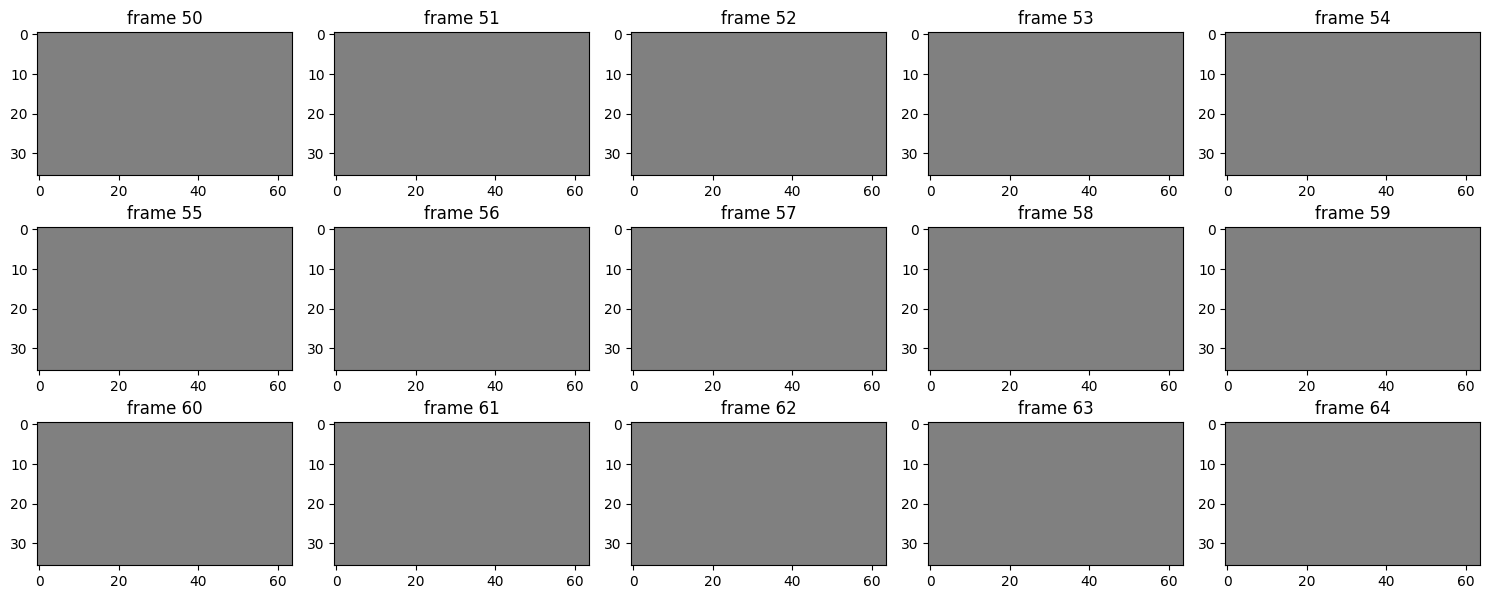

In [11]:
frames = np.arange(50,65)
video_i.plot_changes()
video_i.plot_frames(frames)
video_j.plot_changes()
video_j.plot_frames(frames)

### check 2 instances of a repeated video

In [13]:
dat.filter_trials(recording=all_recording_folders[1], ID="v467193")

,recording,label,ID,trial,trial_type,valid_frames,valid_trial
16,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,180,train,300,True
115,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,461,final_test_bonus,300,True
152,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,141,live_test_bonus,300,True
213,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,191,train,300,True
403,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,338,live_test_bonus,300,True
425,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,4,final_test_main,300,True
474,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,263,final_test_main,300,True
556,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,526,train,300,True
670,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,19,final_test_bonus,300,True
698,dynamic29228-2-10-Video-8744edeac3b4d1ce16b680...,NaturalVideo,v467193,198,final_test_bonus,300,True


In [14]:
rec = 'dynamic29228-2-10-Video-8744edeac3b4d1ce16b680916b5267ce'
video_i = dat.load_video_by_trial(recording=rec, trial='526')
video_j = dat.load_video_by_trial(recording=rec, trial='4')

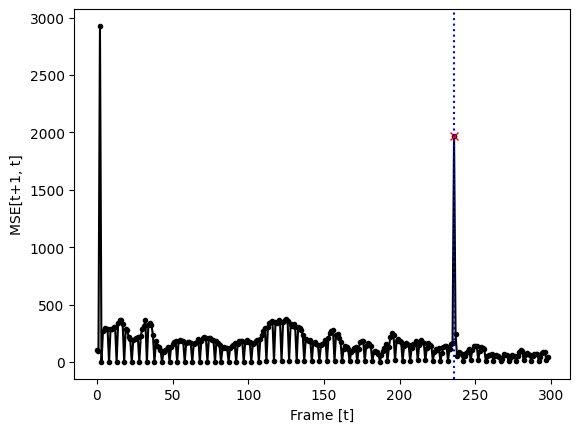

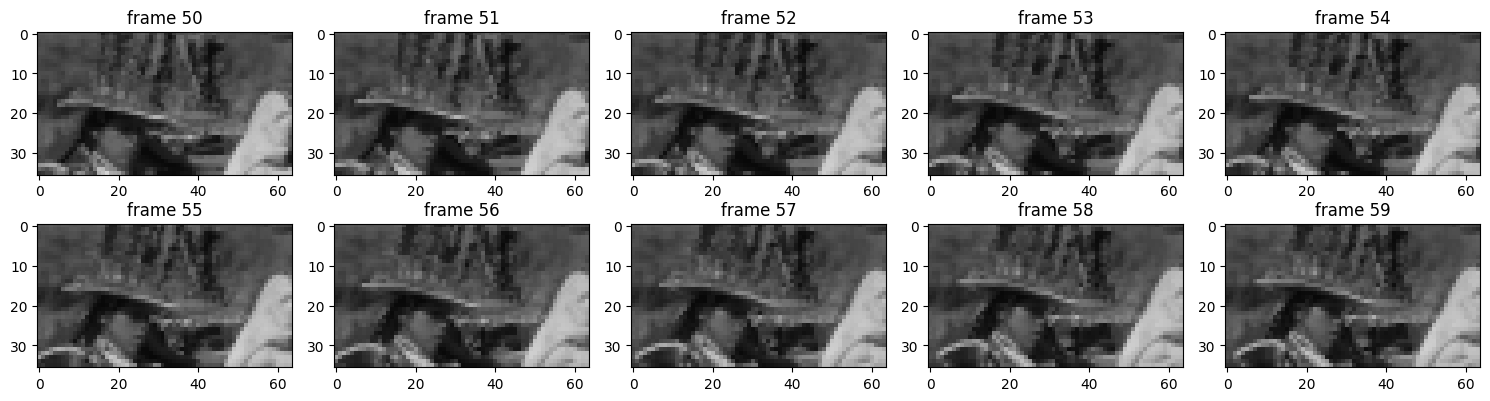

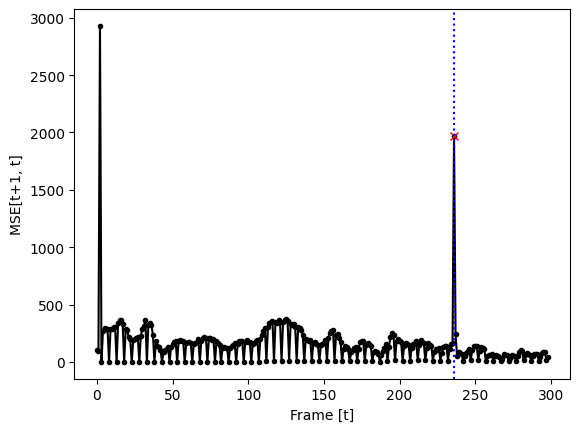

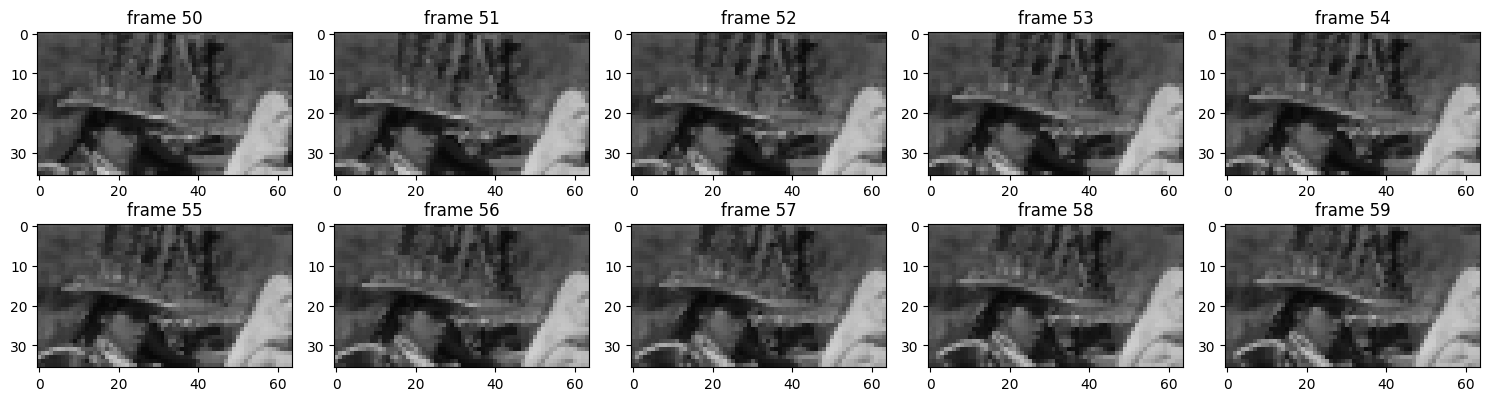

In [15]:
frames = np.arange(50,60)
h = video_i.plot_changes()
h = video_i.plot_frames(frames)
h = video_j.plot_changes()
h = video_j.plot_frames(frames)

# Check the distribution of dissimilarity values

### For NaturalVideos

In [ ]:
recording_folder = all_recording_folders[1]
thelabel = 'NaturalVideo'

dissimilarity, trials_df = dat.compute_dissimilarity_videos(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
#h = ax[0].hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=500)
h = ax[0].hist(dissimilarity.flatten(), range=(0, 20000), bins=200)
h = ax[1].hist(dissimilarity.flatten(), range=(0, 5000), bins=100)

 14%|█▎        | 72/527 [02:01<12:49,  1.69s/it]


KeyboardInterrupt: 

### For Gabor

100%|██████████| 59/59 [00:17<00:00,  3.36it/s]


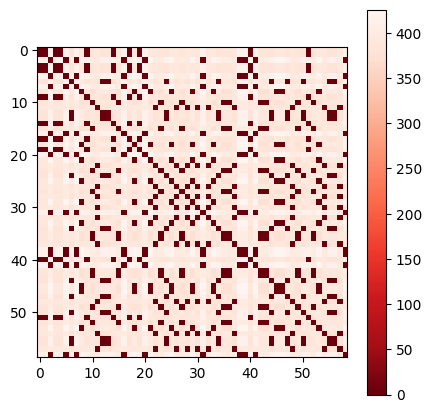

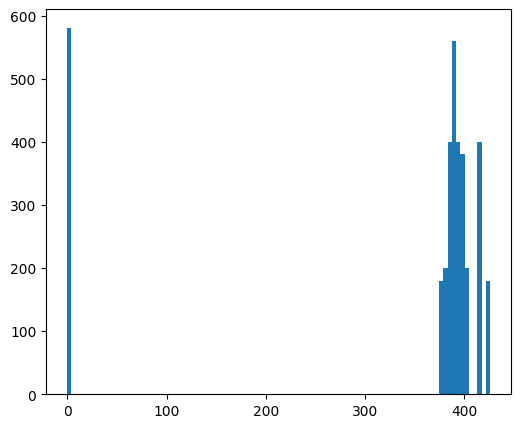

In [16]:
recording_folder = all_recording_folders[1]
thelabel = 'Gabor'

dissimilarity, trials_df = dat.compute_dissimilarity_video_trials(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
h = ax.hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=100)


### For NaturalImages

100%|██████████| 59/59 [00:05<00:00, 10.02it/s]


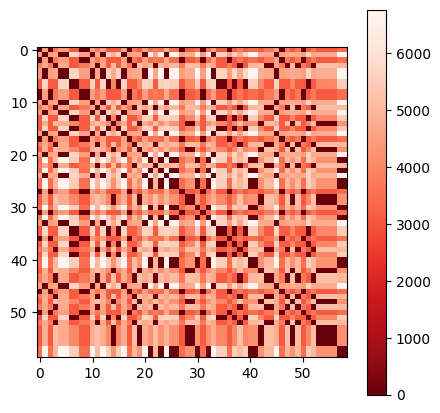

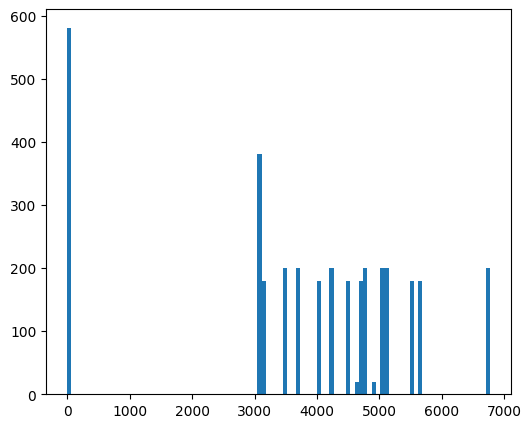

In [ ]:
recording_folder = all_recording_folders[1]
thelabel = 'NaturalImages'

dissimilarity, trials_df = dat.compute_dissimilarity_video_trials(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
h = ax.hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=100)

### For PinkNoise

100%|██████████| 59/59 [00:05<00:00, 10.43it/s]


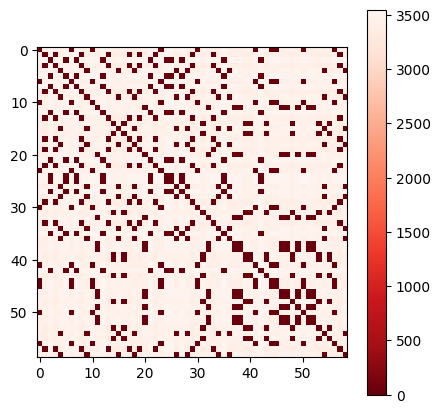

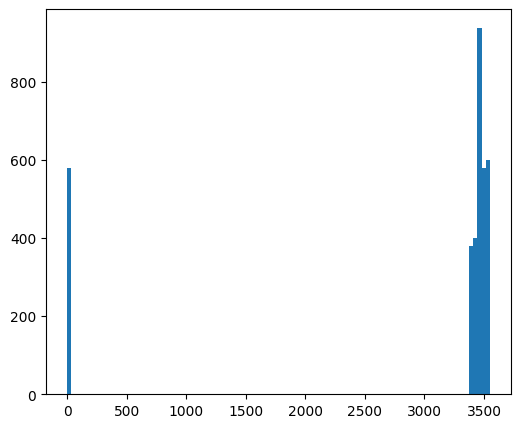

In [ ]:
recording_folder = all_recording_folders[1]
thelabel = 'PinkNoise'

dissimilarity, trials_df = dat.compute_dissimilarity_video_trials(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
h = ax.hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=100)

### For RandomDots

100%|██████████| 79/79 [00:08<00:00,  9.87it/s]


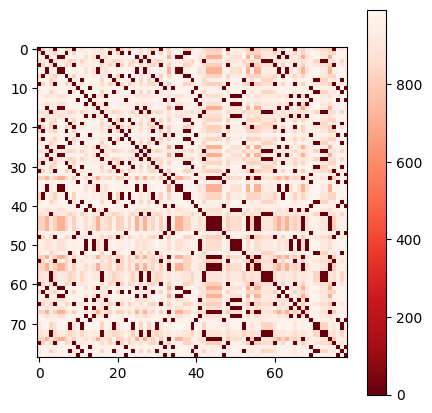

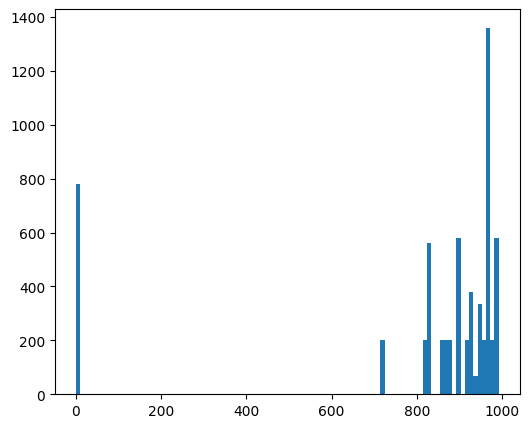

In [ ]:
recording_folder = all_recording_folders[0]
thelabel = 'RandomDots'

dissimilarity, trials_df = dat.compute_dissimilarity_video_trials(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
h = ax.hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=100)

### For GaussianDot

100%|██████████| 59/59 [00:07<00:00,  8.17it/s]


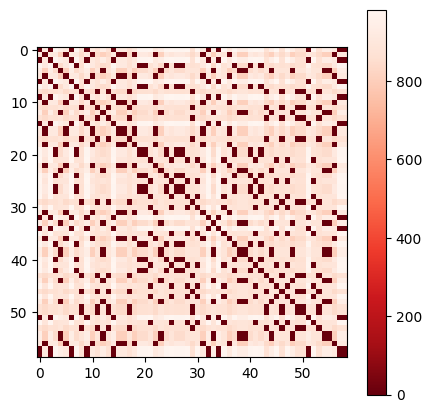

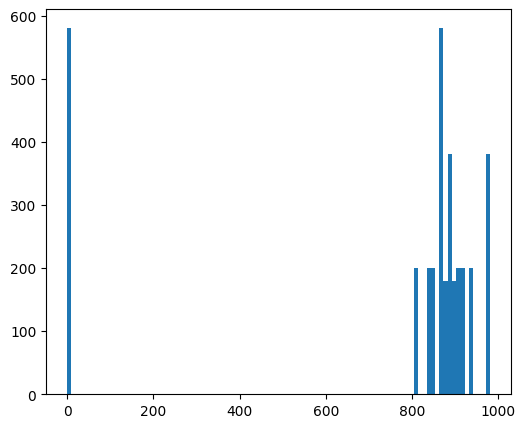

In [ ]:
recording_folder = all_recording_folders[0]
thelabel = 'GaussianDot'

dissimilarity, trials_df = dat.compute_dissimilarity_video_trials(recording=recording_folder, label=thelabel, check_edges_first=False)

# plot dissimilarity matrix
fig, ax =plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
vmax = np.max(dissimilarity[np.isnan(dissimilarity)==False].flatten())
im_diss = ax.imshow(dissimilarity, cmap='Reds_r', vmin=0, vmax=vmax)
fig.colorbar(im_diss, ax=ax)

# plot histogrma with the distribution
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
h = ax.hist(dissimilarity.flatten(), range=(0, np.nanmax(dissimilarity.flatten())), bins=100)

for Gabor the similarity is grater. Likely because there is overlap of all the backgound. It reaches 0.75 for ssim and 9 for mse

For the NaturalVideos, structural similarity seeems to work better than the MSE. 
SSIM separates videos with low and high. MSE also separates but data are more spread. However, there is a jump from videos with MSE = 0 and then the rest with MSE>20.
Therefore, using limits for ssim = 0.95 and mse = 5 results are the same